In [71]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import operator
from sklearn import cluster
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('news_headlines.csv')
uw_df = pd.read_csv('useless_words.csv')

In [21]:
def represents_number(s):
    for c in '0123456789':
        if s[0] == c:
            return True
    return False
    '''try:
        float(s)
        return True
    except ValueError:
        return False'''

def convert_word(s):
    # take out useless characters
    s = s.translate({ord(c): None for c in '!@#:;\'\"*)([]{}%.,&'})
    # plural
    if len(s) > 0 and s[len(s)-1] == 's':
        s = s[:-1]
    return s

In [22]:
useless_words = set(uw_df.useless_words.values.tolist())

headlines = []

bag_of_words = {}
for i, headline in enumerate(df.headline_text):
    if i%(len(df.headline_text)//10) == 0:
        print(i,end=' ')
    if len(headlines)==0 or len(headlines[-1])!=0:
        headlines.append([])
    for word in headline.split(' '):
        word = convert_word(word)
        if (len(word) == 0):
            continue
        # useless words
        if (word in useless_words):
            continue
        # money
        if (word[0] == '$'):
            continue
        # number
        if (represents_number(word)):
            continue
        
        if (word in bag_of_words):
            bag_of_words[word] += 1
        else:
            bag_of_words[word] = 1
            
        if (word not in headlines[-1]):
            headlines[-1].append(word)
        #print(headlines)


0 100000 200000 300000 400000 500000 600000 700000 800000 900000 1000000 

In [23]:
print(len(bag_of_words))

63878


In [24]:
sorted_dict = sorted(bag_of_words.items(), key=operator.itemgetter(1))[-400:]
print(sorted_dict)

[('korea', 2538), ('staff', 2542), ('number', 2545), ('trump', 2548), ('cattle', 2556), ('five', 2557), ('expected', 2558), ('crisi', 2558), ('reveal', 2563), ('use', 2565), ('olympic', 2566), ('company', 2567), ('highlight', 2569), ('chinese', 2577), ('who', 2578), ('nrl', 2582), ('young', 2593), ('plant', 2602), ('soldier', 2605), ('prison', 2609), ('bu', 2614), ('youth', 2624), ('grower', 2625), ('issue', 2627), ('victory', 2632), ('nz', 2633), ('through', 2651), ('victoria', 2651), ('promise', 2656), ('boat', 2660), ('asylum', 2667), ('town', 2669), ('shire', 2681), ('oil', 2684), ('announce', 2688), ('race', 2690), ('light', 2709), ('arrest', 2710), ('highway', 2711), ('climate', 2723), ('hi', 2733), ('food', 2746), ('hear', 2756), ('care', 2760), ('bomb', 2764), ('airport', 2766), ('despite', 2783), ('shark', 2788), ('cancer', 2789), ('site', 2789), ('right', 2795), ('week', 2804), ('release', 2819), ('debate', 2820), ('million', 2821), ('party', 2822), ('city', 2823), ('coal', 2

In [44]:
indexes = {sorted_dict[i][0]:i for i in range(0,len(sorted_dict))}
matrix = np.zeros((len(df.headline_text),len(indexes)),dtype=np.uint8)

for i in range(0,len(headlines)):
    for word in (j for j in headlines[i] if j in indexes):
        matrix[i,indexes[word]] = 1 if word in indexes else 0

        


In [63]:
kmeans = cluster.MiniBatchKMeans(10,verbose = 1,batch_size=1000)
print(kmeans.get_params().keys())

dict_keys(['n_clusters', 'n_init', 'compute_labels', 'max_iter', 'init', 'init_size', 'reassignment_ratio', 'verbose', 'batch_size', 'max_no_improvement', 'tol', 'random_state'])


In [ ]:
np.random.shuffle(matrix)

labels = list(range(2,20))
inertias = []

for i in labels:
    print(i)
    kmeans = cluster.MiniBatchKMeans(i,verbose = 1,batch_size=1000,max_no_improvement=None)
    kmeans.fit(matrix)
    inertias.append(kmeans.inertia_)


2
Init 1/3 with method: k-means++
Inertia for init 1/3: 6233.797498
Init 2/3 with method: k-means++
Inertia for init 2/3: 6231.300719
Init 3/3 with method: k-means++
Inertia for init 3/3: 6249.230855
Minibatch iteration 1/100100: mean batch inertia: 2.117151, ewa inertia: 2.117151 
Minibatch iteration 2/100100: mean batch inertia: 2.126279, ewa inertia: 2.117169 
Minibatch iteration 3/100100: mean batch inertia: 2.076728, ewa inertia: 2.117088 
Minibatch iteration 4/100100: mean batch inertia: 2.106137, ewa inertia: 2.117066 
Minibatch iteration 5/100100: mean batch inertia: 2.123773, ewa inertia: 2.117080 
Minibatch iteration 6/100100: mean batch inertia: 2.014766, ewa inertia: 2.116875 
Minibatch iteration 7/100100: mean batch inertia: 2.087040, ewa inertia: 2.116815 
Minibatch iteration 8/100100: mean batch inertia: 2.077466, ewa inertia: 2.116737 
Minibatch iteration 9/100100: mean batch inertia: 2.106463, ewa inertia: 2.116716 
Minibatch iteration 10/100100: mean batch inertia: 2.

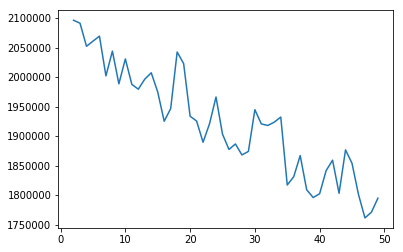

In [77]:
plt.plot(labels, inertias)
plt.show()